In [ ]:
# Author: Brandon Botzer
# Date: 1/18/2024
# Class: Penn State - AI 879

# Import an image and modify the pixel values
# I do this using first the PIL package, followed by using skimage and matplotlib
# The methods result in slightly different grayscale replaced images

In [1]:
# Import common image package for image manipulation
from PIL import Image

# Additional image packs for a different way to load
import skimage as ski
import numpy as np
import matplotlib.pyplot as plt

# Using PIL

In [2]:
# Open the image file
im = Image.open('input_image.tiff')

In [3]:
# Display the image to ensure it is read properly
im.show()

In [4]:
# Convert to from 3 channel RGB to 8-bit pixel greyscale
im_grey = im.convert('L')

In [5]:
# Show the greyscale image
im_grey.show()

In [6]:
# Save out the greyscale image
im_grey.save('im_grey.jpg')

In [7]:
# Copy the greyscale image so that I can run modifications on it without
#  chaning the origional
im_grey_mod = im_grey.copy()

In [8]:
# Get the row and column dimensions of the greyscale image
# From the website, this should be 512, 512
row, col = im_grey_mod.size

In [9]:
# Loop over all row-columns (pixels) and check the pixel value
# Values less than 90 are brought to zero
# Values greater than 90 are brought to 255

for r in range(row):
    for c in range(col):
        if im_grey_mod.getpixel((r,c)) < 90:
            im_grey_mod.putpixel((r,c), 0)
        else:
            im_grey_mod.putpixel((r,c), 255)

In [10]:
# Display the image to ensure it is read properly
im_grey_mod.show()

In [11]:
# Save out modified image
im_grey_mod.save('im_grey_modified.jpg')

# Using skimage and matplotlib

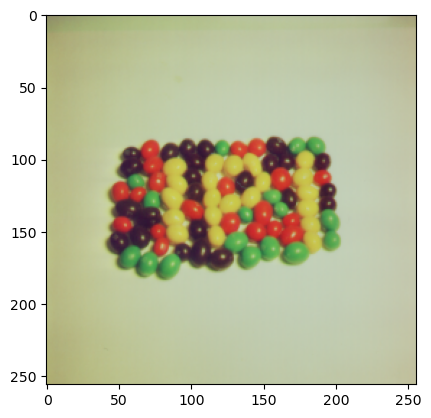

In [12]:
# Read in
im2 = ski.io.imread('input_image.tiff')
plt.imshow(im2)

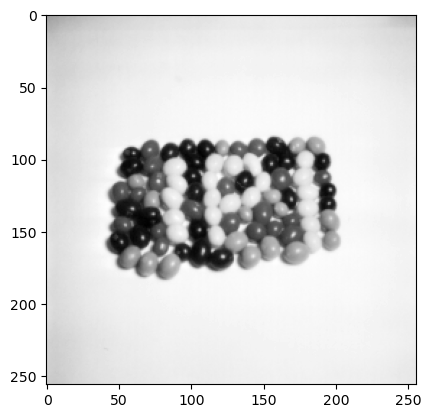

In [13]:
# Convert to grayscale
im2_gray = ski.color.rgb2gray(im2)
plt.imshow(im2_gray, cmap='gray') # must use correct colormap for display

In [14]:
# Store shape of the image
row2, col2 = im2_gray.shape

In [15]:
# I needed to create a new limit as the rgb2gray normalizes the pixel values between 0 and 1
# This normalization changes the output slightly compared to the PIL version.

limit = 90/255
limit

0.35294117647058826

In [16]:
# Loop to replace pixels at the solved limit
for r in range(row2):
    for c in range(col2):
        if im2_gray[r,c] < limit:
            im2_gray[r,c] = 0
        else:
            im2_gray[r,c] = 1

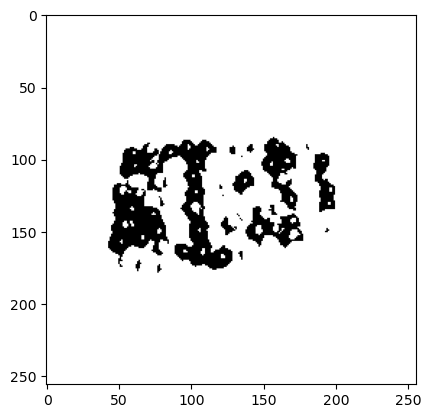

In [17]:
# Display modified image
plt.imshow(im2_gray, cmap='gray')

In [18]:
# The im2_gray is currently a float image.  It must be converted to a unsigned byte format to save as a JPEG.
im2_gray_unsigned = ski.util.img_as_ubyte(im2_gray)

# Save the image
ski.io.imsave('im_grey_modified_skimage.jpg', im2_gray_unsigned, check_contrast=False)

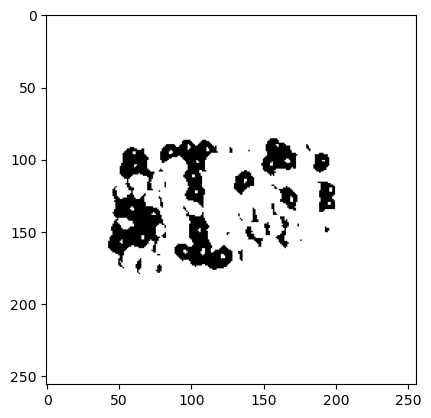

In [19]:
# Note once again the slight difference between the PIL version and the skimage version due to the normalization

# Convert PIL to numpy for matplotlib
im_grey_mod_mat = np.array(im_grey_mod)

# PIL version
plt.imshow(im_grey_mod_mat, cmap='gray')

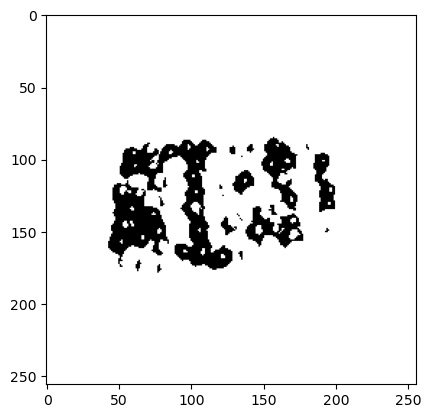

In [20]:
# skimage normalized version
plt.imshow(im2_gray_unsigned, cmap='gray')